In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
PATH_INPUT_DATA = '[i] data/'
PATH_OUTPUT_TABLE = '[i] table/'

In [3]:
if not(os.path.isdir(PATH_OUTPUT_TABLE)):
    os.makedirs(PATH_OUTPUT_TABLE)

In [4]:
# train
filename = 'train.csv'
path = PATH_INPUT_DATA + filename
df_train = pd.read_csv(path)

# test
filename = 'test.csv'
path = PATH_INPUT_DATA + filename
df_test = pd.read_csv(path)

# 제출용
filename = 'sample_submission.csv'
path = PATH_INPUT_DATA + filename
df_submission = pd.read_csv(path)

In [5]:
df_train

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,15,0.23929,0.30265,0.39929,0.51000,0.64072,0.77328,0.86722,0.95891,...,6.788642e-16,0.000000e+00,5.516467e-16,9.690979e-16,1.391635e-15,5.460702e-14,12.68,4.11,12.31,0.10
9996,9996,20,0.02583,0.00946,0.03650,0.01380,0.04093,0.04363,0.03260,0.05282,...,1.814274e-16,1.117148e-16,7.352416e-17,NaN,5.825347e-16,4.226436e-15,8.46,4.11,10.46,3.12
9997,9997,10,0.57589,0.62976,0.70571,0.77248,0.85402,0.92796,0.97691,0.98933,...,4.828451e-11,3.110419e-11,8.119095e-12,NaN,1.504115e-10,4.003657e-10,9.84,3.20,10.45,2.06
9998,9998,15,1.01477,1.01504,0.99125,0.98747,1.00717,1.01434,0.99529,1.01322,...,3.279271e-13,0.000000e+00,4.475946e-14,NaN,2.818857e-12,1.408742e-11,6.38,4.06,11.28,4.03


In [6]:
df_test

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,10000,15,0.15406,0.23275,0.30977,0.42949,0.51264,0.62558,0.74340,0.85418,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,NaN,7.320236e-14
1,10001,15,0.48552,0.56939,0.67575,0.79089,0.85114,0.92581,0.98071,0.98177,...,1.036013e-13,NaN,2.830975e-14,1.114337e-13,4.825731e-14,NaN,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
2,10002,10,0.46883,0.56085,0.62442,0.73172,0.81724,0.91517,0.94801,0.99108,...,NaN,NaN,NaN,NaN,1.569208e-11,6.242378e-12,NaN,1.219010e-11,NaN,NaN
3,10003,10,0.06905,0.07517,0.10226,0.14905,0.16182,0.19659,0.26085,0.36753,...,1.651177e-11,7.282747e-12,5.010879e-12,NaN,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,NaN
4,10004,25,0.00253,0.00757,0.01649,0.00128,0.00000,0.00000,0.00105,0.01975,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,15,0.04334,0.03279,0.05853,0.04070,0.07704,0.07859,0.06168,0.08903,...,7.889599e-13,NaN,4.903209e-13,1.365078e-12,7.929664e-13,0.000000e+00,0.000000e+00,1.472213e-13,1.479745e-12,5.391520e-12
9996,19996,25,0.00020,0.02009,0.01726,0.03816,0.08300,0.08681,0.15300,0.18099,...,1.240848e-17,6.258180e-18,8.693704e-20,NaN,4.514449e-18,NaN,9.128300e-19,NaN,3.928314e-18,2.586781e-17
9997,19997,15,0.00000,0.00000,0.00120,0.00000,0.04347,0.14882,0.40883,0.80365,...,0.000000e+00,NaN,0.000000e+00,2.610282e-14,7.789652e-15,NaN,1.271388e-15,1.436617e-15,0.000000e+00,1.743751e-13
9998,19998,20,0.08390,0.05690,0.08343,0.12324,0.12720,0.16732,0.18149,0.23766,...,0.000000e+00,7.084232e-18,NaN,0.000000e+00,2.669004e-18,8.586549e-18,0.000000e+00,4.489194e-18,2.892986e-17,NaN


In [7]:
df_train.keys()

Index(['id', 'rho', '650_src', '660_src', '670_src', '680_src', '690_src',
       '700_src', '710_src', '720_src', '730_src', '740_src', '750_src',
       '760_src', '770_src', '780_src', '790_src', '800_src', '810_src',
       '820_src', '830_src', '840_src', '850_src', '860_src', '870_src',
       '880_src', '890_src', '900_src', '910_src', '920_src', '930_src',
       '940_src', '950_src', '960_src', '970_src', '980_src', '990_src',
       '650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst', 'hhb', 'hbo2',
       'ca', 'na'],
      dtype='object')

In [8]:
col_input = ['rho', '650_src', '660_src', '670_src', '680_src', '690_src',
             '700_src', '710_src', '720_src', '730_src', '740_src', '750_src',
             '760_src', '770_src', '780_src', '790_src', '800_src', '810_src',
             '820_src', '830_src', '840_src', '850_src', '860_src', '870_src',
             '880_src', '890_src', '900_src', '910_src', '920_src', '930_src',
             '940_src', '950_src', '960_src', '970_src', '980_src', '990_src',
             '650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
             '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
             '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
             '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
             '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
             '950_dst', '960_dst', '970_dst', '980_dst', '990_dst']
col_output = ['hhb', 'hbo2', 'ca', 'na']

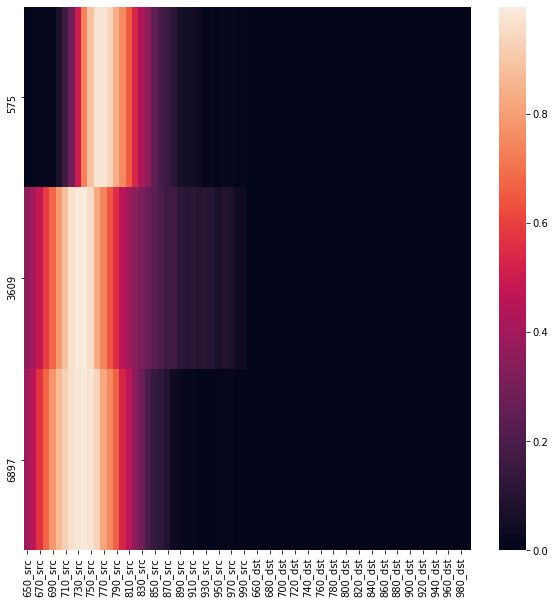

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train[col_input[1:]].dropna(axis=0))

In [10]:
# 1.데이터셋 생성하기
#x_train = df_train[col_input]
#y_train = df_train[col_output]
#x_test = df_test[col_input]
#y_test = df_test[col_output]
df_train_dropped = df_train.dropna(axis=0)
X = df_train_dropped[col_input]
Y = df_train_dropped[col_output]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [11]:
# 2.모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=len(col_input), activation='relu'))
model.add(Dense(4))

In [12]:
# 3.모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

In [13]:
# 4.모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
2/2 [==============================] - 0s 198ms/step - loss: 9.9542
Epoch 2/50
2/2 [==============================] - 0s 2ms/step - loss: 7.2202
Epoch 3/50
2/2 [==============================] - 0s 2ms/step - loss: 5.7317
Epoch 4/50
2/2 [==============================] - 0s 3ms/step - loss: 4.7370
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 4.0176
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 3.4769
Epoch 7/50
2/2 [==============================] - 0s 4ms/step - loss: 3.0637
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 2.7407
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 2.4859
Epoch 10/50
2/2 [==============================] - 0s 3ms/step - loss: 2.2846
Epoch 11/50
2/2 [==============================] - 0s 3ms/step - loss: 2.1255
Epoch 12/50
2/2 [==============================] - 0s 3ms/step - loss: 2.0002
Epoch 13/50
2/2 [==============================] - 0s 5ms/step - loss: 

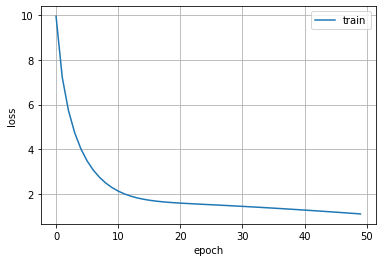

In [14]:
# 5.학습과정 살펴보기
plt.plot(hist.history['loss'])
#plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.grid()
plt.show()

In [15]:
# 6.모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss: '+str(loss))

1/1 [==============================] - 0s 119ms/step
loss: 2.737988233566284


In [16]:
# 제출용
x_test_submit = df_test[col_input].fillna(0.1)
#y_test_submit = df_test[col_output]

loss = model.predict(x_test_submit)
print('loss: '+str(loss))

loss: [[5.796256   2.387424   5.51973    0.53316504]
 [5.723661   2.3828616  5.689295   0.62122184]
 [4.8523293  1.902959   4.356568   0.43522197]
 ...
 [4.7540765  1.9408847  4.9265113  0.7009899 ]
 [6.411083   2.7642179  6.6313314  0.98582274]
 [6.786158   2.2774286  5.563329   0.78740674]]


In [17]:
df_sub = pd.DataFrame(loss, columns=['hhb', 'hbo2', 'ca', 'na'])
df_submission = pd.concat([df_test['id'], df_sub], axis=1)

display(df_submission)

path = PATH_OUTPUT_TABLE+'submission.csv'
df_submission.to_csv(path, index=False)

,id,hhb,hbo2,ca,na
0,10000,5.796256,2.387424,5.519730,0.533165
1,10001,5.723661,2.382862,5.689295,0.621222
2,10002,4.852329,1.902959,4.356568,0.435222
3,10003,3.948837,1.535759,3.526969,0.380732
4,10004,8.576776,3.085704,8.567119,1.384369
...,...,...,...,...,...
9995,19995,6.545202,2.283672,5.460420,0.714386
9996,19996,9.139338,3.459211,8.442113,1.237687
9997,19997,4.754076,1.940885,4.926511,0.700990
9998,19998,6.411083,2.764218,6.631331,0.985823
